In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.legend_handler import HandlerLine2D

import imageio.v2 as imio
import numpy as np
import scipy as sp
from scipy.special import i0, i1 

import torch as tch
import torchvision.models as models

import os
from steerable_pyramid import SteerablePyramid
import toolbox as tb

mpl.rc('text', usetex=True)
mpl.rc('font', family='serif')
mpl.rc('text.latex',\
       preamble=r'\usepackage{amsmath}'\
                +r'\usepackage{amssymb}'\
                +r'\usepackage{lmodern}')

def update(handle, orig):
    handle.update_from(orig)
    handle.set_linewidth(8)

In [14]:
N = 1000
EPS = 1e-3
x = np.linspace(EPS,1-EPS,N)

phi_ori = x
sig_bdw = (1.5+12*x)*np.pi/180.0
phi_ori_bdw = np.sqrt( 1/(4*sig_bdw**6)\
                *(1 - i1(1/(4*sig_bdw**2))/i0(1/(4*sig_bdw**2))\
                    *(4*sig_bdw**2+i1(1/(4*sig_bdw**2))/i0(1/(4*sig_bdw**2)))))
phi_ori_bdw = np.cumsum(phi_ori_bdw)/phi_ori_bdw.sum()

z0 = 256./38.*(0.5+3.0*x)
phi_z0 = np.log(z0/z0[0])/np.log(z0[-1]/z0[0])

bz = 0.25+3.0*x
phi_bz = np.sqrt(np.log(2)/2*(1+4/(bz**2*np.log(2))))
phi_bz = np.cumsum(phi_bz)/phi_bz.sum()

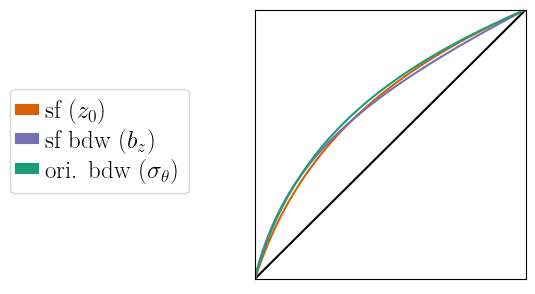

In [15]:
## individual plots

labels = ['orientation']
colors = [[0.,0.5,0.8],[0.,0.6,0.],[0.6,0.0,0.],'gray']
# colorblind safe
colors = ['#1b9e77','#d95f02','#7570b3']

label_color_1 = ['k']
label_color_2 = ['k']
label_color_3 = ['k'] 


fig, ax = plt.subplots(1,1,figsize=(3.5,3.5))
tex = []
ax.plot(x, x, c='k', ls='-')
ax.plot(x, phi_z0, c=colors[1], label=r'sf ($z_0$)', ls='-')
ax.plot(x, phi_bz, c=colors[2], label=r'sf bdw ($b_z$)', ls='-')
ax.plot(x, phi_ori_bdw, c=colors[0], label=r'ori. bdw ($\sigma_\theta$)', ls='-')

ax.tick_params('both', labelsize=14)
ax.set_xlim(0,1)
ax.set_ylim(0.0,1.0)
ax.set_xticks([])
ax.set_yticks([])

ax.legend(fontsize=18,
        handler_map={plt.Line2D : HandlerLine2D(update_func=update)},
        handlelength=0.5, handletextpad=0.5, borderaxespad=0.2,
        frameon=True, borderpad=0.4, labelspacing=0.2,
        columnspacing=0.5, bbox_to_anchor=(-0.92,0.3),
        loc='lower left',ncol=1)

In [14]:
fig.savefig('figs/perceptual_scale_pred_mc.pdf', format='pdf', bbox_inches='tight')

In [17]:
directory = 'stimuli/'

textures_np = np.zeros((15,3,512,512))

k = 0
for subdir in sorted(os.listdir(directory)):
    for filename in sorted(os.listdir(directory+subdir+'/syn')):
        print(subdir,filename)
        if filename[-6:]=='00.png':
            textures_np[k,0] = imio.imread(directory+subdir+'/syn/'+filename,
                                           pilmode='L')
        if filename[-6:]=='06.png':
            textures_np[k,1] = imio.imread(directory+subdir+'/syn/'+filename,
                                           pilmode='L')
        elif filename[-6:]=='12.png':
            textures_np[k,2] = imio.imread(directory+subdir+'/syn/'+filename, 
                                           pilmode='L')

    k += 1

pair_01 pair_01_00.png
pair_01 pair_01_01.png
pair_01 pair_01_02.png
pair_01 pair_01_03.png
pair_01 pair_01_04.png
pair_01 pair_01_05.png
pair_01 pair_01_06.png
pair_01 pair_01_07.png
pair_01 pair_01_08.png
pair_01 pair_01_09.png
pair_01 pair_01_10.png
pair_01 pair_01_11.png
pair_01 pair_01_12.png
pair_02 pair_02_00.png
pair_02 pair_02_01.png
pair_02 pair_02_02.png
pair_02 pair_02_03.png
pair_02 pair_02_04.png
pair_02 pair_02_05.png
pair_02 pair_02_06.png
pair_02 pair_02_07.png
pair_02 pair_02_08.png
pair_02 pair_02_09.png
pair_02 pair_02_10.png
pair_02 pair_02_11.png
pair_02 pair_02_12.png
pair_03 pair_03_00.png
pair_03 pair_03_01.png
pair_03 pair_03_02.png
pair_03 pair_03_03.png
pair_03 pair_03_04.png
pair_03 pair_03_05.png
pair_03 pair_03_06.png
pair_03 pair_03_07.png
pair_03 pair_03_08.png
pair_03 pair_03_09.png
pair_03 pair_03_10.png
pair_03 pair_03_11.png
pair_03 pair_03_12.png
pair_04 pair_04_00.png
pair_04 pair_04_01.png
pair_04 pair_04_02.png
pair_04 pair_04_03.png
pair_04 pai

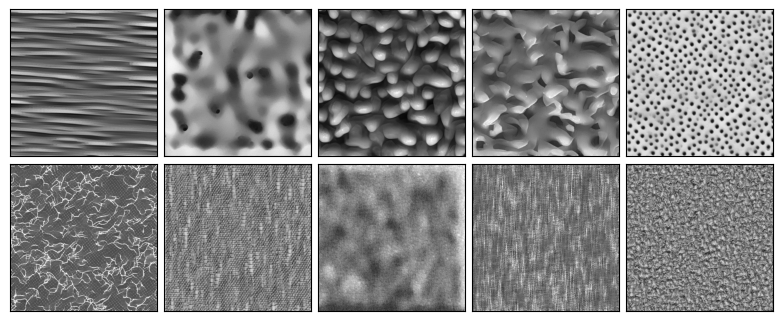

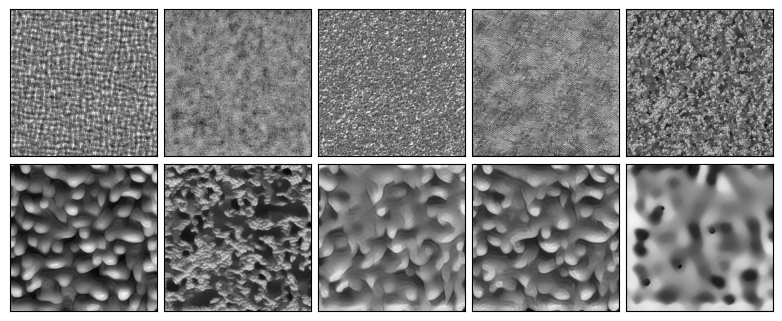

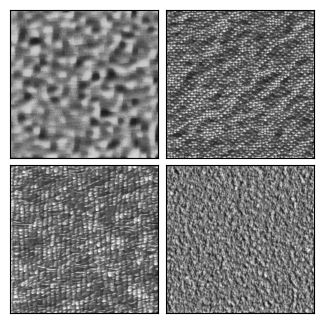

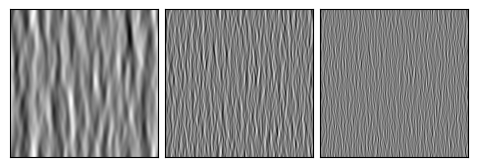

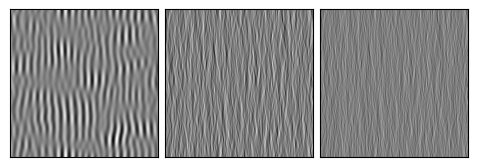

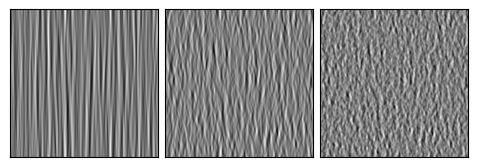

In [21]:
fig ,ax = tb.disp([textures_np[k,2*l] for l in range(2) for k in range(5)], (2,5), 1);
fig.subplots_adjust(wspace=0.05,hspace=0.05)
fig.savefig('figs/texture-pairs-1-5.pdf', format='pdf', bbox_inches='tight')

fig ,ax = tb.disp([textures_np[5+k,2*l] for l in range(2) for k in range(5)], (2,5), 1);
fig.subplots_adjust(wspace=0.05,hspace=0.05)
fig.savefig('figs/texture-pairs-6-10.pdf', format='pdf', bbox_inches='tight')

fig ,ax = tb.disp([textures_np[10+k,2*l] for l in range(2) for k in range(2)], (2,2), 1);
fig.subplots_adjust(wspace=0.05,hspace=0.05)
fig.savefig('figs/texture-pairs-11-12.pdf', format='pdf', bbox_inches='tight')

idx = [1,2,0]

fig ,ax = tb.disp([textures_np[12+idx[0],l] for l in range(3)], (1,3), 1);
fig.subplots_adjust(wspace=0.05,hspace=0.05)
fig.savefig('figs/texture-pairs-sf.pdf', format='pdf', bbox_inches='tight')

fig ,ax = tb.disp([textures_np[12+idx[1],l] for l in range(3)], (1,3), 1);
fig.subplots_adjust(wspace=0.05,hspace=0.05)
fig.savefig('figs/texture-pairs-sf-bdw.pdf', format='pdf', bbox_inches='tight')

fig ,ax = tb.disp([textures_np[12+idx[2],l] for l in range(3)], (1,3), 1);
fig.subplots_adjust(wspace=0.05,hspace=0.05)
fig.savefig('figs/texture-pairs-ori-bdw.pdf', format='pdf', bbox_inches='tight')


In [18]:
def to_numpy(a):
    return a.detach().numpy()

vgg = models.vgg19()
layers = np.array([0,2,5,7,10])+1
steerpyr = SteerablePyramid(textures_np.shape[-1],textures_np.shape[-1],up_sampled=True, real=True)
textures = tch.from_numpy(textures_np[:,::2]).type(tch.float)

In [22]:
n_T = 100
T = np.linspace(0,1,n_T, dtype=np.float32)
fisher_info_normed = np.zeros((12,7,n_T))
for i in range(12):
    for j in range(7):
        if j==0:
            features = textures[i].unsqueeze(1)
        elif j==1:
            features = textures[i].unsqueeze(1)
        elif j==2:
            features = steerpyr(textures[i].unsqueeze(0))[0]
        else:
            layer = layers[j-2]
            features = vgg.features[:layer](
                textures[i].unsqueeze(1).repeat_interleave(3,1))
        
        if j==1:
            a = to_numpy(features[0].mean())
            b = to_numpy(features[1].mean())
            feat0 = features[0]-features[0].mean((0,1,2),keepdim=True)
            feat1 = features[1]-features[1].mean((0,1,2),keepdim=True)
            A = to_numpy(tch.abs(tch.fft.fft2(feat0,norm='ortho'))**2)+1e-6
            B = to_numpy(tch.abs(tch.fft.fft2(feat1,norm='ortho'))**2)+1e-6
            mu_prime = b-a
            sqrtB = B**0.5

            Q0 = A**0.5
            Q0 = np.complex64(Q0)

            sigma_prime_t =  lambda t: 2*(sqrtB-Q0)*(t*sqrtB + (1-t)*Q0)
            mu_t = lambda t: t*b+(1-t)*a
            sigma_t = lambda t: (t*sqrtB + (1-t)*Q0)**2

            def fisher_info_t(t):
                sigma_t_inv = 1/sigma_t(t)
                sigma_prime = sigma_prime_t(t)
                res = np.sum(mu_prime**2*sigma_t_inv)\
                    + 0.5*np.sum(sigma_prime**2*sigma_t_inv**2)
                return res

        else:
            D = features.shape[1]
            N_px = features.shape[-1]
            features = features.reshape(2,D,N_px*N_px)
            a = to_numpy(features[0].mean(1))
            b = to_numpy(features[1].mean(1))
            feat0 = features[0]-features[0].mean(1, keepdim=True)
            feat1 = features[1]-features[1].mean(1, keepdim=True)
            A = to_numpy(feat0@feat0.T/(N_px*N_px-1))+1e-6*np.eye(D)
            B = to_numpy(feat1@feat1.T/(N_px*N_px-1))+1e-6*np.eye(D)
            mu_prime = b-a
            sqrtB = sp.linalg.sqrtm(B)

            Q0 = np.linalg.pinv(sqrtB)@sp.linalg.sqrtm(sqrtB@A@sqrtB)
            Q1 = sqrtB@sp.linalg.sqrtm(sqrtB@A@sqrtB)@np.linalg.pinv(sqrtB)
            Q2 = np.linalg.pinv(sqrtB)@sp.linalg.sqrtm(sqrtB@A@sqrtB)@sqrtB
            
            Q0 = np.complex64(Q0)
            Q1 = np.complex64(Q1)
            Q2 = np.complex64(Q2)

            sigma_prime_t =  lambda t: 2*t*(A+B-Q1-Q2)+(Q1+Q2-2*B)
            mu_t = lambda t: t*b+(1-t)*a
            sigma_t = lambda t: (t*sqrtB + (1-t)*Q0).T@(t*sqrtB + (1-t)*Q0)

            def fisher_info_t(t):
                sigma_t_inv = np.linalg.pinv(sigma_t(t))
                sigma_prime = sigma_prime_t(t)
                res = mu_prime.T@sigma_t_inv@mu_prime\
                    + 0.5*np.trace(sigma_t_inv@sigma_prime@sigma_t_inv@sigma_prime)
                return res

        fisher_info_t_vec = np.vectorize(fisher_info_t)
        prior = np.sqrt(fisher_info_t_vec(T)).real
        fisher_info_normed[i,j] = prior/prior.sum()


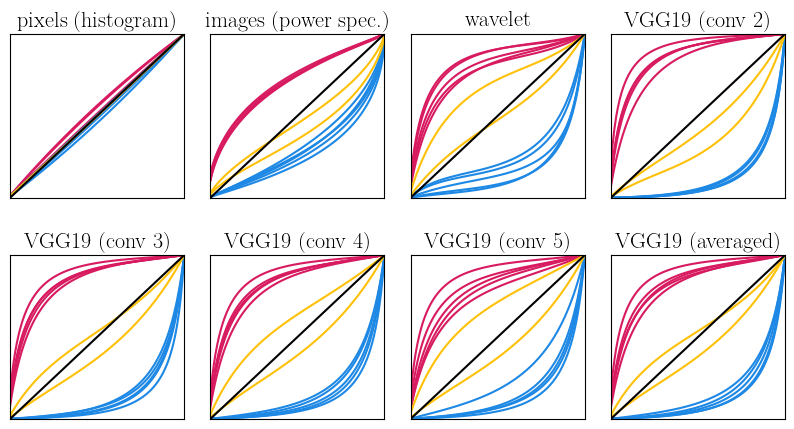

In [13]:
fig, ax = plt.subplots(2,4,figsize=(10.0,5.0))
fig.subplots_adjust(wspace=0.15,hspace=0.35)

colors = ['#D81B60','#D81B60','#D81B60','#D81B60','#D81B60',
          '#1E88E5','#1E88E5','#1E88E5','#1E88E5','#1E88E5',
          '#FFC107','#FFC107']
mpl.rcParams["axes.prop_cycle"] = mpl.cycler('color',colors)
idx = list(range(12))

k = 0
l = 0
for i in range(7):
    fisher_info_plot = fisher_info_normed[idx,i].T.cumsum(0)
    ax[k,l].plot(T,fisher_info_plot);
    ax[k,l].plot(T,T,c='k');
    ax[k,l].tick_params('both', labelsize=14)
    ax[k,l].set_xticks([])
    ax[k,l].set_yticks([])
    if i==0:
        ax[k,l].set_title(r'pixels (histogram)', fontsize=16)
    elif i==1:
        ax[k,l].set_title(r'images (power spec.)', fontsize=16)
    elif i==2:
        ax[k,l].set_title(r'wavelet', fontsize=16)
    else:
        ax[k,l].set_title(r'VGG19 (conv {})'.format(i-1), fontsize=16)
        
    ax[k,l].set_xlim(0,1)
    ax[k,l].set_ylim(0,1)
    if i<4:
        ax[k,l].get_xaxis().set_visible(False)
    if i in {4,5,6}:
        pass
    if i in {0,4}:
        pass
    else:
        ax[k,l].get_yaxis().set_visible(False)
    l+=1
    if i==3:
        k+=1
        l=0
    
ax[1,-1].plot(T,fisher_info_normed[:,3:].mean(1).T.cumsum(0));
ax[1,-1].plot(T,T,c='k');
ax[1,-1].tick_params('both', labelsize=14)
ax[1,-1].set_title(r'VGG19 (averaged)', fontsize=16);
ax[1,-1].set_xlim(0,1)
ax[1,-1].set_ylim(0,1);
ax[1,-1].get_yaxis().set_visible(False)
ax[1,-1].set_xticks([])
ax[1,-1].set_yticks([])
    
fig.savefig('figs/pred-mlds-interp-pairs.pdf', format='pdf', bbox_inches='tight')


In [14]:
np.savez('pred_mlds.npz',pred_mlds=fisher_info_normed)